In [19]:
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import numpy as np
import os

In [60]:
ed_code = 'ex'
vocab_size = 50000 #44300 이상

df = pd.read_csv('..\\data\\wondata_%s.csv'%ed_code, encoding='utf-8-sig', index_col=0) # 데이터 불러오기

# 라벨분류
y_i = df['LABEL']
X_i = df.drop(['LABEL','ATS_KDCD_DTL'], axis=1)

# 테스트 셋과 분류
X_train, X_test, y_train, y_test = train_test_split(X_i, y_i, test_size=0.1, stratify=y_i)

##### 라벨을 원핫인코딩
y_train = to_categorical(np.array(y_train))
y_test = to_categorical(np.array(y_test))
####

In [61]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16638, 10), (16638, 31), (1849, 10), (1849, 31))

In [68]:

from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from tensorflow.python.keras.callbacks import TensorBoard


##### 일단계 분류 하이퍼 파라미터 설정
hp_dict = {
        "emb_dim": 128,
        "dropput":0.2,
        "epochs":100,
        "batch_size":128,
        "activation_function":"softmax",
        "learning_rate" : 0.001, #0.001 default
        "decay" : 0.0,
        "momentum" : 0.9,
        "clipnorm" : 1.,
        "beta_1":0.9, #default 0.9
        "beta_2":0.999, #default 0.999
        "rho":0.95,
        "schedule_decay":0.004,
        "epsilon":1e-7, #default 1e-7
        "vocab_size": vocab_size
         }

##### baseline 모델


model = Sequential()
model.add(Embedding(hp_dict['vocab_size'], hp_dict["emb_dim"], input_length=X_train.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(y_train.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

plot_path = '..\\models\\plot_%s.png'%(ed_code)
plot_model(model, to_file=plot_path, show_shapes=True)

log_path = "..\\models\\{}\\logs\\".format(ed_code)
tb = TensorBoard(log_dir=log_path)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
model_path = '..\\models\\model_%s.h5'%ed_code
mc = ModelCheckpoint(model_path, monitor = 'val_accuracy', mode='max', verbose=1, save_best_only=True)


history = model.fit(X_train, y_train, \
                    epochs=hp_dict["epochs"], \
                    batch_size=hp_dict["batch_size"], \
                    callbacks=[mc, es, tb])


Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_21 (Embedding)    (None, 10, 128)           6400000   
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 10, 128)          0         
 lDropout1D)                                                     
                                                                 
 lstm_21 (LSTM)              (None, 100)               91600     
                                                                 
 dense_17 (Dense)            (None, 31)                3131      
                                                                 
Total params: 6,494,731
Trainable params: 6,494,731
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
130/130 [==============================] - 10s 61ms/step - loss: 1.8580 - accuracy: 0.4940
E

130/130 [==============================] - 8s 60ms/step - loss: 0.0812 - accuracy: 0.9751
Epoch 20/100
130/130 [==============================] - 7s 57ms/step - loss: 0.0782 - accuracy: 0.9746
Epoch 21/100
130/130 [==============================] - 8s 59ms/step - loss: 0.0763 - accuracy: 0.9753
Epoch 22/100
130/130 [==============================] - 9s 71ms/step - loss: 0.0753 - accuracy: 0.9753
Epoch 23/100
130/130 [==============================] - 8s 61ms/step - loss: 0.0726 - accuracy: 0.9756
Epoch 24/100
130/130 [==============================] - 8s 62ms/step - loss: 0.0719 - accuracy: 0.9764
Epoch 25/100
130/130 [==============================] - 8s 63ms/step - loss: 0.0703 - accuracy: 0.9772
Epoch 26/100
130/130 [==============================] - 8s 64ms/step - loss: 0.0683 - accuracy: 0.9767
Epoch 27/100
130/130 [==============================] - 8s 63ms/step - loss: 0.0682 - accuracy: 0.9767
Epoch 28/100
130/130 [==============================] - 8s 59ms/step - loss: 0.0665 - 

130/130 [==============================] - 8s 65ms/step - loss: 0.0579 - accuracy: 0.9801
Epoch 40/100
130/130 [==============================] - 8s 60ms/step - loss: 0.0564 - accuracy: 0.9805
Epoch 41/100
130/130 [==============================] - 8s 63ms/step - loss: 0.0561 - accuracy: 0.9811
Epoch 42/100
130/130 [==============================] - 8s 61ms/step - loss: 0.0558 - accuracy: 0.9799
Epoch 43/100
130/130 [==============================] - 9s 66ms/step - loss: 0.0552 - accuracy: 0.9804
Epoch 44/100
130/130 [==============================] - 9s 69ms/step - loss: 0.0532 - accuracy: 0.9815
Epoch 45/100
130/130 [==============================] - 9s 66ms/step - loss: 0.0538 - accuracy: 0.9811
Epoch 46/100
130/130 [==============================] - 8s 62ms/step - loss: 0.0535 - accuracy: 0.9815
Epoch 47/100
130/130 [==============================] - 8s 58ms/step - loss: 0.0530 - accuracy: 0.9818
Epoch 48/100
130/130 [==============================] - 8s 58ms/step - loss: 0.0538 - 

130/130 [==============================] - 8s 59ms/step - loss: 0.0504 - accuracy: 0.9814
Epoch 61/100
130/130 [==============================] - 8s 59ms/step - loss: 0.0496 - accuracy: 0.9817
Epoch 62/100
130/130 [==============================] - 8s 61ms/step - loss: 0.0499 - accuracy: 0.9817
Epoch 63/100
130/130 [==============================] - 8s 61ms/step - loss: 0.0490 - accuracy: 0.9820
Epoch 64/100
130/130 [==============================] - 8s 62ms/step - loss: 0.0495 - accuracy: 0.9824
Epoch 65/100
130/130 [==============================] - 7s 57ms/step - loss: 0.0494 - accuracy: 0.9810
Epoch 66/100
130/130 [==============================] - 7s 56ms/step - loss: 0.0494 - accuracy: 0.9826
Epoch 67/100
130/130 [==============================] - 7s 57ms/step - loss: 0.0478 - accuracy: 0.9823
Epoch 68/100
130/130 [==============================] - 7s 57ms/step - loss: 0.0477 - accuracy: 0.9829
Epoch 69/100
130/130 [==============================] - 7s 57ms/step - loss: 0.0485 - 

130/130 [==============================] - 7s 57ms/step - loss: 0.0467 - accuracy: 0.9824
Epoch 82/100
130/130 [==============================] - 7s 58ms/step - loss: 0.0474 - accuracy: 0.9822
Epoch 83/100
130/130 [==============================] - 8s 59ms/step - loss: 0.0471 - accuracy: 0.9824
Epoch 84/100
130/130 [==============================] - 7s 56ms/step - loss: 0.0470 - accuracy: 0.9817
Epoch 85/100
130/130 [==============================] - 8s 60ms/step - loss: 0.0459 - accuracy: 0.9825
Epoch 86/100
130/130 [==============================] - 8s 63ms/step - loss: 0.0463 - accuracy: 0.9818
Epoch 87/100
130/130 [==============================] - 7s 57ms/step - loss: 0.0469 - accuracy: 0.9822
Epoch 88/100
130/130 [==============================] - 8s 61ms/step - loss: 0.0463 - accuracy: 0.9822
Epoch 89/100
130/130 [==============================] - 8s 61ms/step - loss: 0.0463 - accuracy: 0.9828
Epoch 90/100
130/130 [==============================] - 8s 60ms/step - loss: 0.0467 - 

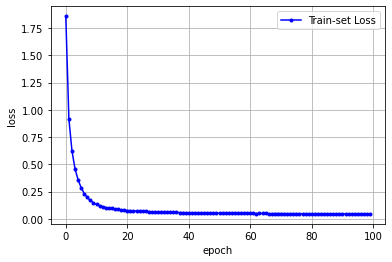

In [70]:
import matplotlib.pyplot as plt


y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

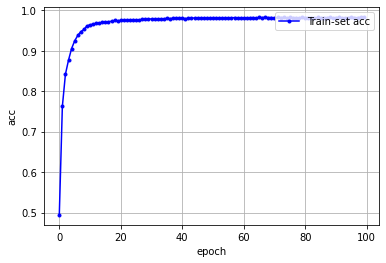

In [71]:
import matplotlib.pyplot as plt


y_loss = history.history['accuracy']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set acc")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

In [72]:
y_test_arg=np.argmax(y_test,axis=1)
y_pred = np.argmax(model.predict(X_test),axis=1)

58/58 [==============================] - 0s 2ms/step


In [73]:
from sklearn.metrics import *
print(classification_report(y_test_arg, y_pred))
print('acc:', round(accuracy_score(y_test_arg, y_pred),3))
print('precision:', round(precision_score(y_test_arg, y_pred, average='weighted'),3))
print('recall:', round(recall_score(y_test_arg, y_pred, average='weighted'),3))
print('f1-score:', round(f1_score(y_test_arg, y_pred, average='weighted'),3))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       356
           1       0.57      0.40      0.47        10
           2       0.00      0.00      0.00         6
           3       0.33      0.50      0.40         2
           4       1.00      0.43      0.60         7
           5       0.50      0.50      0.50         2
           6       0.00      0.00      0.00         3
           7       0.67      0.67      0.67         3
           8       1.00      1.00      1.00         2
           9       0.00      0.00      0.00         2
          10       0.92      0.96      0.94        25
          11       0.25      0.33      0.29         3
          12       0.00      0.00      0.00         2
          13       1.00      1.00      1.00         2
          14       0.96      0.91      0.93        78
          15       0.75      0.60      0.67         5
          16       0.97      0.85      0.91        40
          17       0.70    

C:\Users\choi seung un\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\choi seung un\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\choi seung un\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m